# Problem Definition
We are given data of the transactions occured using credit card (kaggle dataset) and we are aimed to detect fradulant transaction by using this data so that in future this does not take place.
Our dataset
 - Have feature columns V1,V2...v28 some attribute .
 - Time of transaction (Time column)
 - Transited amount (Amount column)
 - Class Feature this is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
from sklearn.tree import DecisionTreeClassifier


df = pd.read_csv(r"C:\Users\Administrator\Credit_card_fault\creditcardinfo.csv")
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [2]:
#summery of data set
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#check of any missing values in the data set
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
#check all data format are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory data analysis

In [6]:
#lets check for the numbers of fraud and non fraud entries 

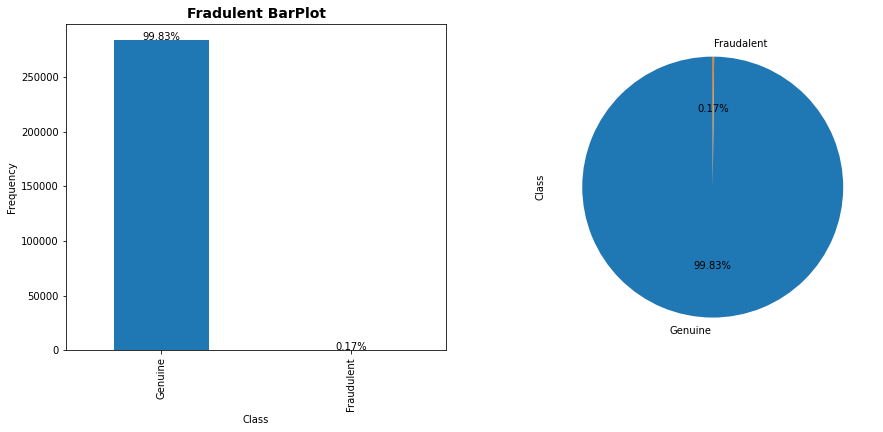

In [3]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Fradulent BarPlot', fontweight='bold', fontsize=14)
count_of_classes = pd.value_counts(df['Class'], sort=True).sort_index()
ax = count_of_classes.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],['Genuine','Fraudulent'])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height +3, '{:1.2f}%'.format(height*100/total), ha='center')

plt.subplot(122)
labels = 'Genuine', 'Fraudalent'
df['Class'].value_counts().plot.pie(autopct= '%1.2f%%', labels = labels, startangle=90)
plt.show()



Number of fraud cases is far greater than non fraud cases or Normal cases (this is guranteed by no bar visible for value 1 i.e. for fraud.

## What is an imbalanced dataset

###### Any dataset would be called imbalanced if there is the very high different between the positive values and negative values. In other words a dataset having huge difference in the no of records for each (any) of it's target class is called imbalanced dataset.
For example in our dataset we have total 284807 records but only 492 of them belongs to class 1 , this clearly show that our dataset is imbalanced .

What it can cause
See as we can obsearve that we have very less no of records for class 1 as compared to class 0 so we would not we able to classify class 1 properly , this is the problem occures due to imbalance dataset.

### How to handle Imbalanced Dataset

To handle imbalanced dataset or to made our model work well on an imbalanced dataset , we need to measure the model's performance in a well descriptive manner , we can't just go and measure the accuracy of the model , because we have 99% of data from class 0 , so it doesn't even matter that how well our model performed on minore class it's accuracy is always going to be very descent. so we should choose estimater wisely in case of Imbalanced dataset!

metrices like Confusion metrices and classification report gives us right estimate even of the dataset is imbalanced.

#### Random Sampling

One of the most widely used technique to handle imbalanced data (to make data balaneced ) is Random sampling.
Random sampling majorly performed in two ways.

- Random Under sampling::
              This involves randomly selecting examples from the majority class and deleting them from the training dataset.


- Random Upper sampling::
              Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset.

<br>

#### Synthetic Minority Over-Sampling Technique (SMOTE)
       SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.


Apart from these methods using emsemble methods is really helpful in handling imbalanced dataset.

We will be using SMOTE for handling our dataset since it's better to generate new data with sampling instead of just copying and deleting current data.

## Implement SMOTE

In [3]:
x = df.drop('Class',axis=1) # x will contain all columns except 'Class'
y = df["Class"] # y will hold only the 'Class' column
print(x.shape, y.shape)

(284807, 30) (284807,)


Data split into training and testing sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=.25)

In [6]:
#implementing SMOTE 
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(x_train, y_train)

In [10]:
print('After SMOTE')

After SMOTE


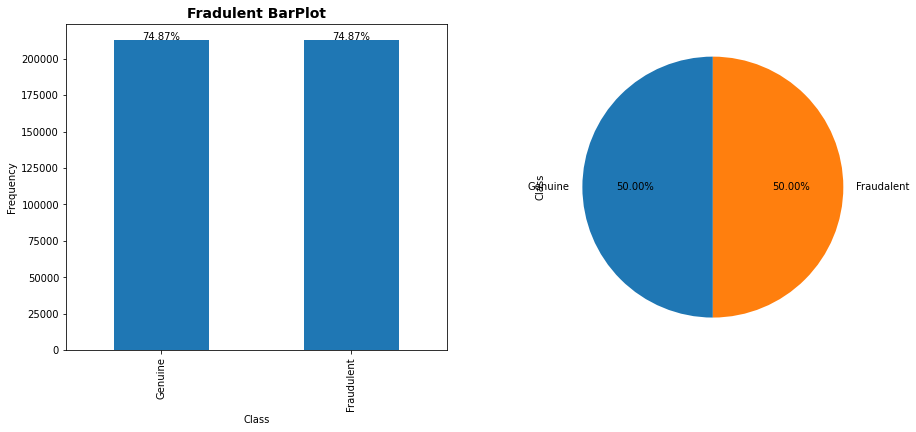

In [9]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Fradulent BarPlot', fontweight='bold', fontsize=14)
count_of_classes = pd.value_counts(Y, sort=True).sort_index()
ax = count_of_classes.plot(kind='bar')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks([0,1],['Genuine','Fraudulent'])

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height +3, '{:1.2f}%'.format(height*100/total), ha='center')

plt.subplot(122)
labels = 'Genuine', 'Fraudalent'
Y.value_counts().plot.pie(autopct= '%1.2f%%', labels = labels, startangle=90)
plt.show()

In [11]:
x.shape,y.shape

((284807, 30), (284807,))

In [12]:
X.shape, Y.shape

((426452, 30), (426452,))

## Classifier

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X, Y)
y_pred = clf.predict(x_test)

acc_dtc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Decision Tree is : 0.9974860256734361
Confusion Matrix : 
[[70936   153]
 [   26    87]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.36      0.77      0.49       113

    accuracy                           1.00     71202
   macro avg       0.68      0.88      0.75     71202
weighted avg       1.00      1.00      1.00     71202



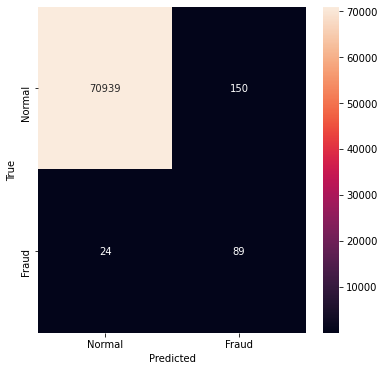

In [14]:
plt.figure(figsize=(6,6))
TAG = ['Normal','Fraud']
sns.heatmap(conf, xticklabels=TAG, yticklabels=TAG, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
%%html
<h1>PROCESS FINISHED</h1>
<link rel="stylesheet" href="style.css">